# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [2]:
hdu = fits.open('flat29.5(3).FIT')
header = hdu[0].header
print(header['exposure'])

29.5


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [3]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('flat*.FIT')
print(flat_list)

['flat153.FIT', 'flat27.FIT', 'flat36.FIT', 'flat4.5.FIT', 'flat90.FIT', 'flat117.FIT', 'flat108.FIT', 'flat0.28.FIT', 'flat63.FIT', 'flat29.5(3).FIT', 'flat126.FIT', 'flat180.FIT', 'flat1.125.FIT', 'flat9.FIT', 'flat12.5.FIT', 'flat45.FIT', 'flat29.5.FIT', 'flat0.5625.FIT', 'flat72.FIT', 'flat54.FIT', 'flat81.FIT', 'flat135.FIT', 'flat29.5(2).FIT', 'flat2.25.FIT', 'flat0.14.FIT', 'flat144.FIT', 'flat18.FIT']


Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [4]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exposure']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 153.0 sec
Mean counts: 34785.47

Exposure time 27.0 sec
Mean counts: 6337.47

Exposure time 36.0 sec
Mean counts: 8638.10

Exposure time 4.5 sec
Mean counts: 1039.42

Exposure time 90.0 sec
Mean counts: 21168.47

Exposure time 117.0 sec
Mean counts: 33911.78

Exposure time 108.0 sec
Mean counts: 31002.38

Exposure time 0.28 sec
Mean counts: 172.71

Exposure time 63.0 sec
Mean counts: 14132.56

Exposure time 29.5 sec
Mean counts: 6457.85

Exposure time 126.0 sec
Mean counts: 33771.87

Exposure time 180.0 sec
Mean counts: 36278.97

Exposure time 1.13 sec
Mean counts: 353.10

Exposure time 9.0 sec
Mean counts: 1810.71

Exposure time 12.5 sec
Mean counts: 2201.62

Exposure time 45.0 sec
Mean counts: 10728.44

Exposure time 29.5 sec
Mean counts: 5958.11

Exposure time 0.56 sec
Mean counts: 228.51

Exposure time 72.0 sec
Mean counts: 14518.43

Exposure time 54.0 sec
Mean counts: 12096.95

Exposure time 81.0 sec
Mean counts: 15436.37

Exposure time 135.0 sec
Mean counts: 30470.0

## Plot mean counts versus exposure time


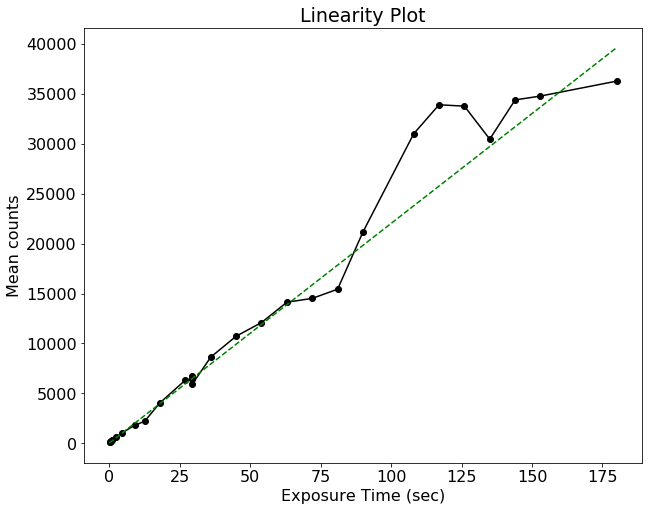

In [14]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16
x = np.linspace(0, 180,10)
y = 220*x+30

plt.plot(exp_times, means, '-ko')
plt.plot(x,y,'--g')
plt.title('Linearity Plot')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()

In [6]:
df = pd.DataFrame(columns=['Exposure Time', 'Mean Counts'],)
df['Exposure Time'] = exp_times
df['Mean Counts'] = means
                       
df

,Exposure Time,Mean Counts
0,0.14,145.513602
1,0.28,172.705174
2,0.56,228.506585
3,1.13,353.095641
4,2.25,612.572633
5,4.50,1039.418760
6,9.00,1810.705733
7,12.50,2201.621869
8,18.00,4067.025780
9,27.00,6337.473059
